## Assignment 1: Machine Learning Methods

### \<Qingyan Yang> \<a1865304>

#### How can we use data analytics to predict energy usage for this house?

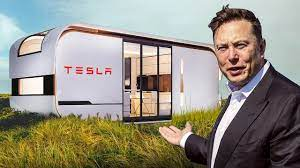


### 1. Read the dataset

import related python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

read data

In [2]:
df = pd.read_csv('energydata_complete-1.csv')

show useful information of data

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.shape


(19735, 29)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

date is object type, some information from it should be transfer to numerical value, such as seconds from midnight (Candanedo et al 2017, p. 85),since every feature value changes with date, will do it in data processing, because need to uniform data first.

In [6]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

list all useful information of the data;
after observation, no obvious useless data columns need to be droped;

but the name should be uniformed, start with upper class letter

In [7]:
#name should be uniformed, start with upper class letter, and add '_' before number
col_names = ['Date', 'Appliances', 'Lights', 'T_1', 'RH_1', 'T_2', 'RH_2', 'T_3',
             'RH_3', 'T_4', 'RH_4', 'T_5', 'RH_5', 'T_6', 'RH_6', 'T_7', 'RH_7', 'T_8',
             'RH_8', 'T_9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
             'Visibility', 'Tdewpoint', 'RV_1', 'RV_2']

df.columns = col_names

df.columns

Index(['Date', 'Appliances', 'Lights', 'T_1', 'RH_1', 'T_2', 'RH_2', 'T_3',
       'RH_3', 'T_4', 'RH_4', 'T_5', 'RH_5', 'T_6', 'RH_6', 'T_7', 'RH_7',
       'T_8', 'RH_8', 'T_9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'RV_1', 'RV_2'],
      dtype='object')

In [8]:
#checking for null values
df.isnull().sum()


Date           0
Appliances     0
Lights         0
T_1            0
RH_1           0
T_2            0
RH_2           0
T_3            0
RH_3           0
T_4            0
RH_4           0
T_5            0
RH_5           0
T_6            0
RH_6           0
T_7            0
RH_7           0
T_8            0
RH_8           0
T_9            0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
RV_1           0
RV_2           0
dtype: int64

there is no null value

#### Data Preprocessing

In [9]:
#strip space of colomn Date
np.unique(df.Date)
df['Date'] = df['Date'].str.strip()

In [10]:
# check if there is invalid value 
df.loc[df['Date']=='?']

,Date,Appliances,Lights,T_1,RH_1,T_2,RH_2,T_3,RH_3,T_4,...,T_9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,RV_1,RV_2


In [11]:
# Adding new columns in our dataset
# since Date should be numerical
# From the date/time variable other extra features are generated: 
# the number of seconds from midnight for each day (NSM)(Candanedo et al 2017, p. 85)

# convert datetime column to pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

# calculate seconds from midnight and seconds from start of day
df['NSM'] = (df['Date'] - df['Date'].dt.normalize()).dt.total_seconds()




In [12]:
#now remove the Date object column
df.drop(columns='Date',inplace=True)

In [13]:
df.head()

,Appliances,Lights,T_1,RH_1,T_2,RH_2,T_3,RH_3,T_4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,RV_1,RV_2,NSM
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200.0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800.0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400.0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,63000.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600.0


data processing done!

### 2. Analyse and visualise the data

The data of appliance is the target that we want to analysis, so first need to see its distribution, and screen out some abnormal value

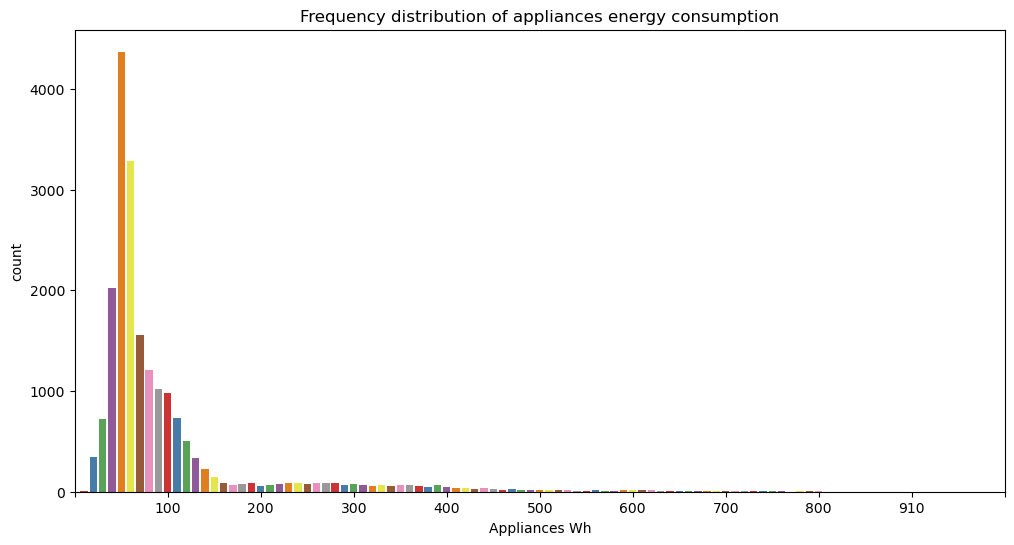

In [14]:
#Appliances energy consumption distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Appliances', data=df, palette='Set1')
plt.xlabel('Appliances Wh')
plt.title('Frequency distribution of appliances energy consumption')
# Set x-axis ticks
plt.xticks(np.arange(-1, 100, 10))
plt.show()


As can be seen the data distribution has a longtail, but it distributed widely, so will be kept
And also, appliances energy consumption has the most frequency ranges from about 20 to 150 W/h

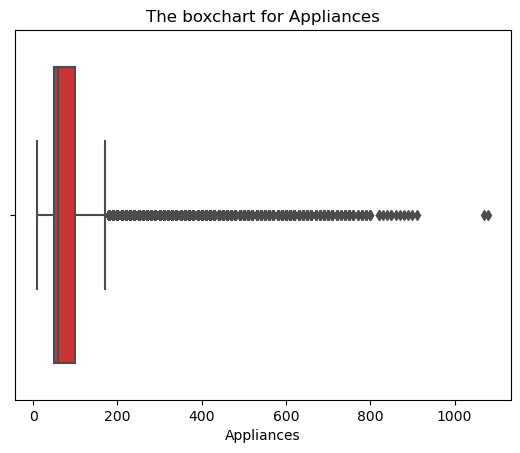

In [15]:
#boxplot
sns.boxplot(x=df['Appliances'][0:], data=df.iloc[0:], order=df['Appliances']
            [0:].value_counts().index, palette='Set1')
plt.title("The boxchart for {}".format('Appliances'))
plt.show()


now we can see that there some outliners needs to be cleared, as it can lead to the result distortion

In [ ]:
#Dropping these outliers as it can lead to the result distortion
temp = df.loc[df['Appliances']>1000,'Appliances'].index
df.drop(index=temp,inplace=True)

In [17]:
np.unique(df['Appliances'])


array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910])

In [18]:
df.isnull().sum()


Appliances     0
Lights         0
T_1            0
RH_1           0
T_2            0
RH_2           0
T_3            0
RH_3           0
T_4            0
RH_4           0
T_5            0
RH_5           0
T_6            0
RH_6           0
T_7            0
RH_7           0
T_8            0
RH_8           0
T_9            0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
RV_1           0
RV_2           0
NSM            0
dtype: int64

now all data is valid, we should start to see therelationships between all the variables with the energy consumption of appliances in the training set.

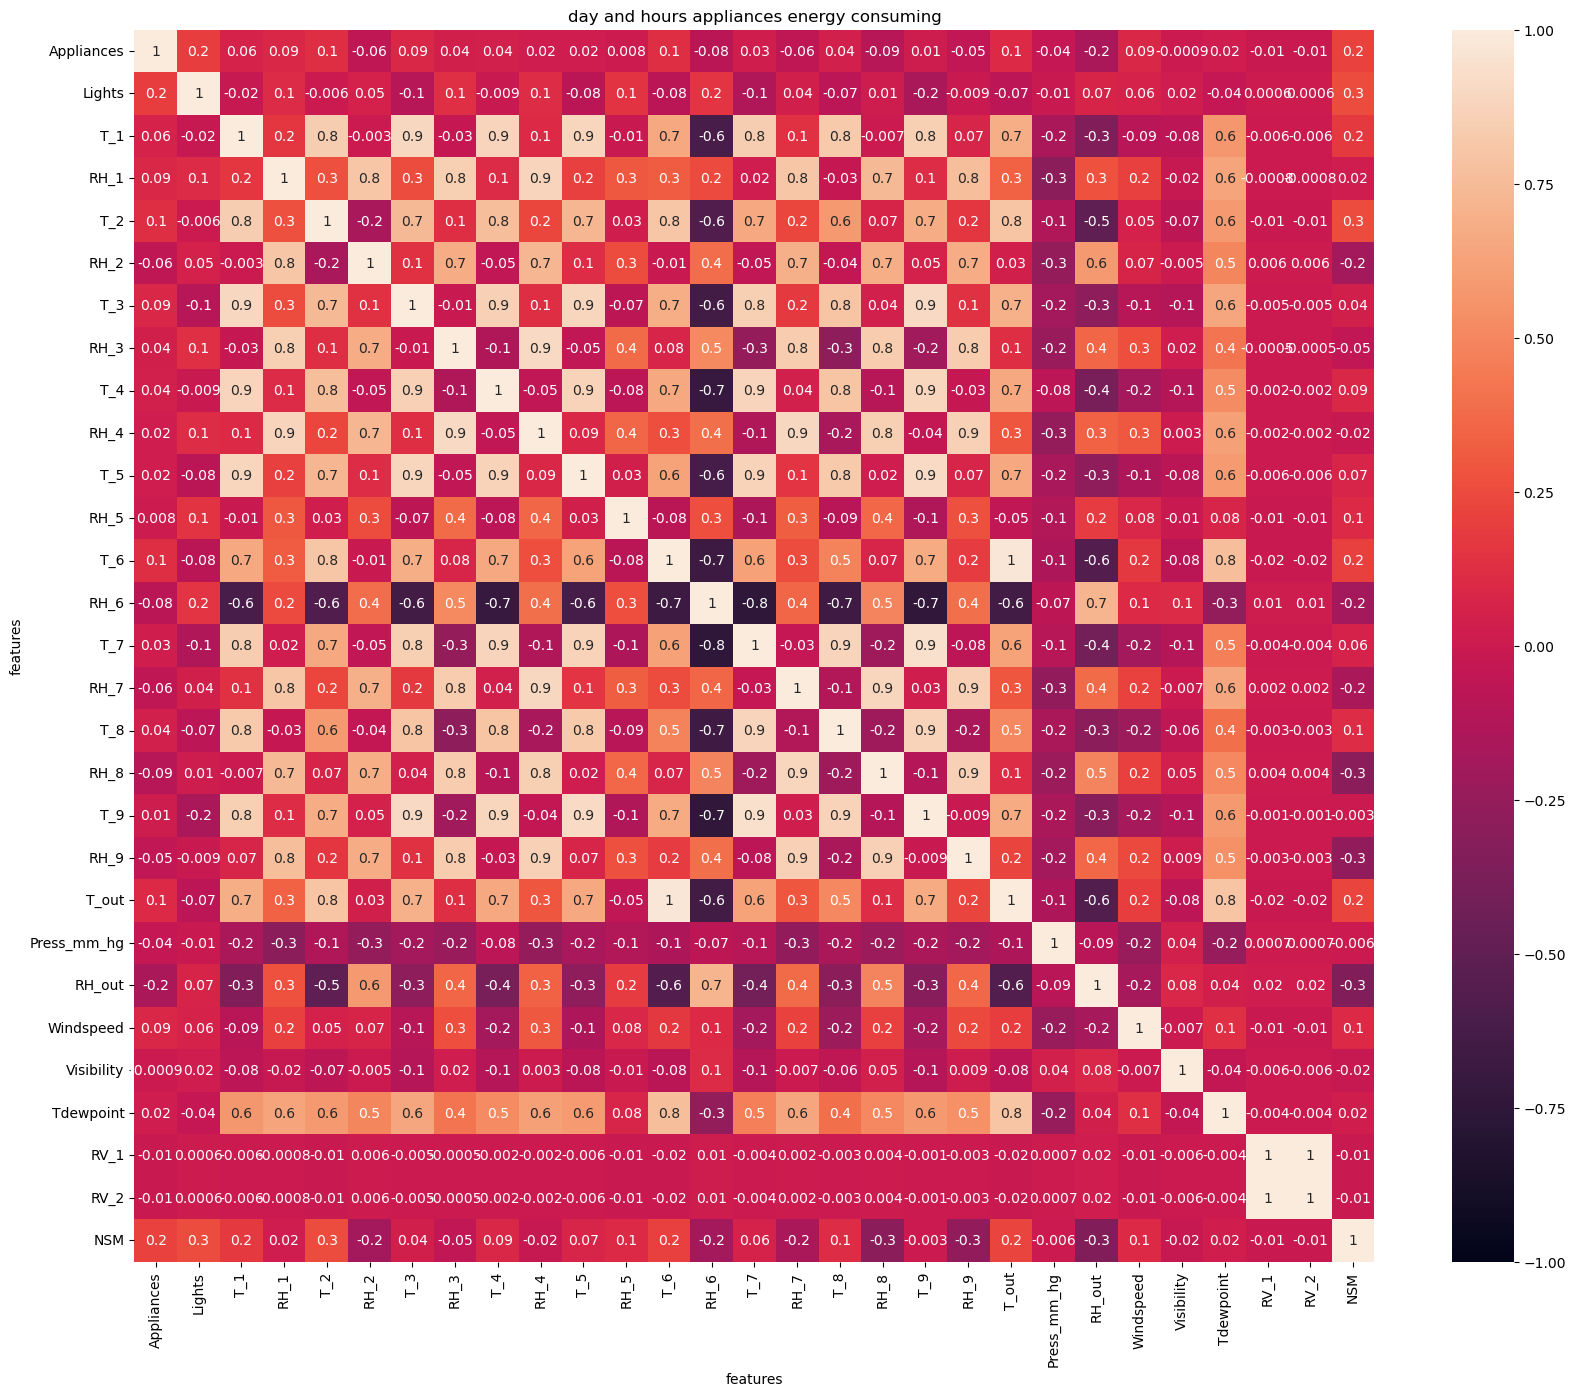

In [19]:
#relationships between all the variables with the energy consumption of appliances in the training set.
corr = df.corr()
#matrix = np.triu(corr)
plt.figure(figsize=(20, 16))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)
plt.title('day and hours appliances energy consuming')
plt.xlabel('features')
plt.ylabel('features')

# Show the plot
plt.show()


we can see how linear correlation between variables can depicted with heatmap

now let us have a more clear look at the relationship only between appliances and other features, since the appliances energy consumption is our target predict object.

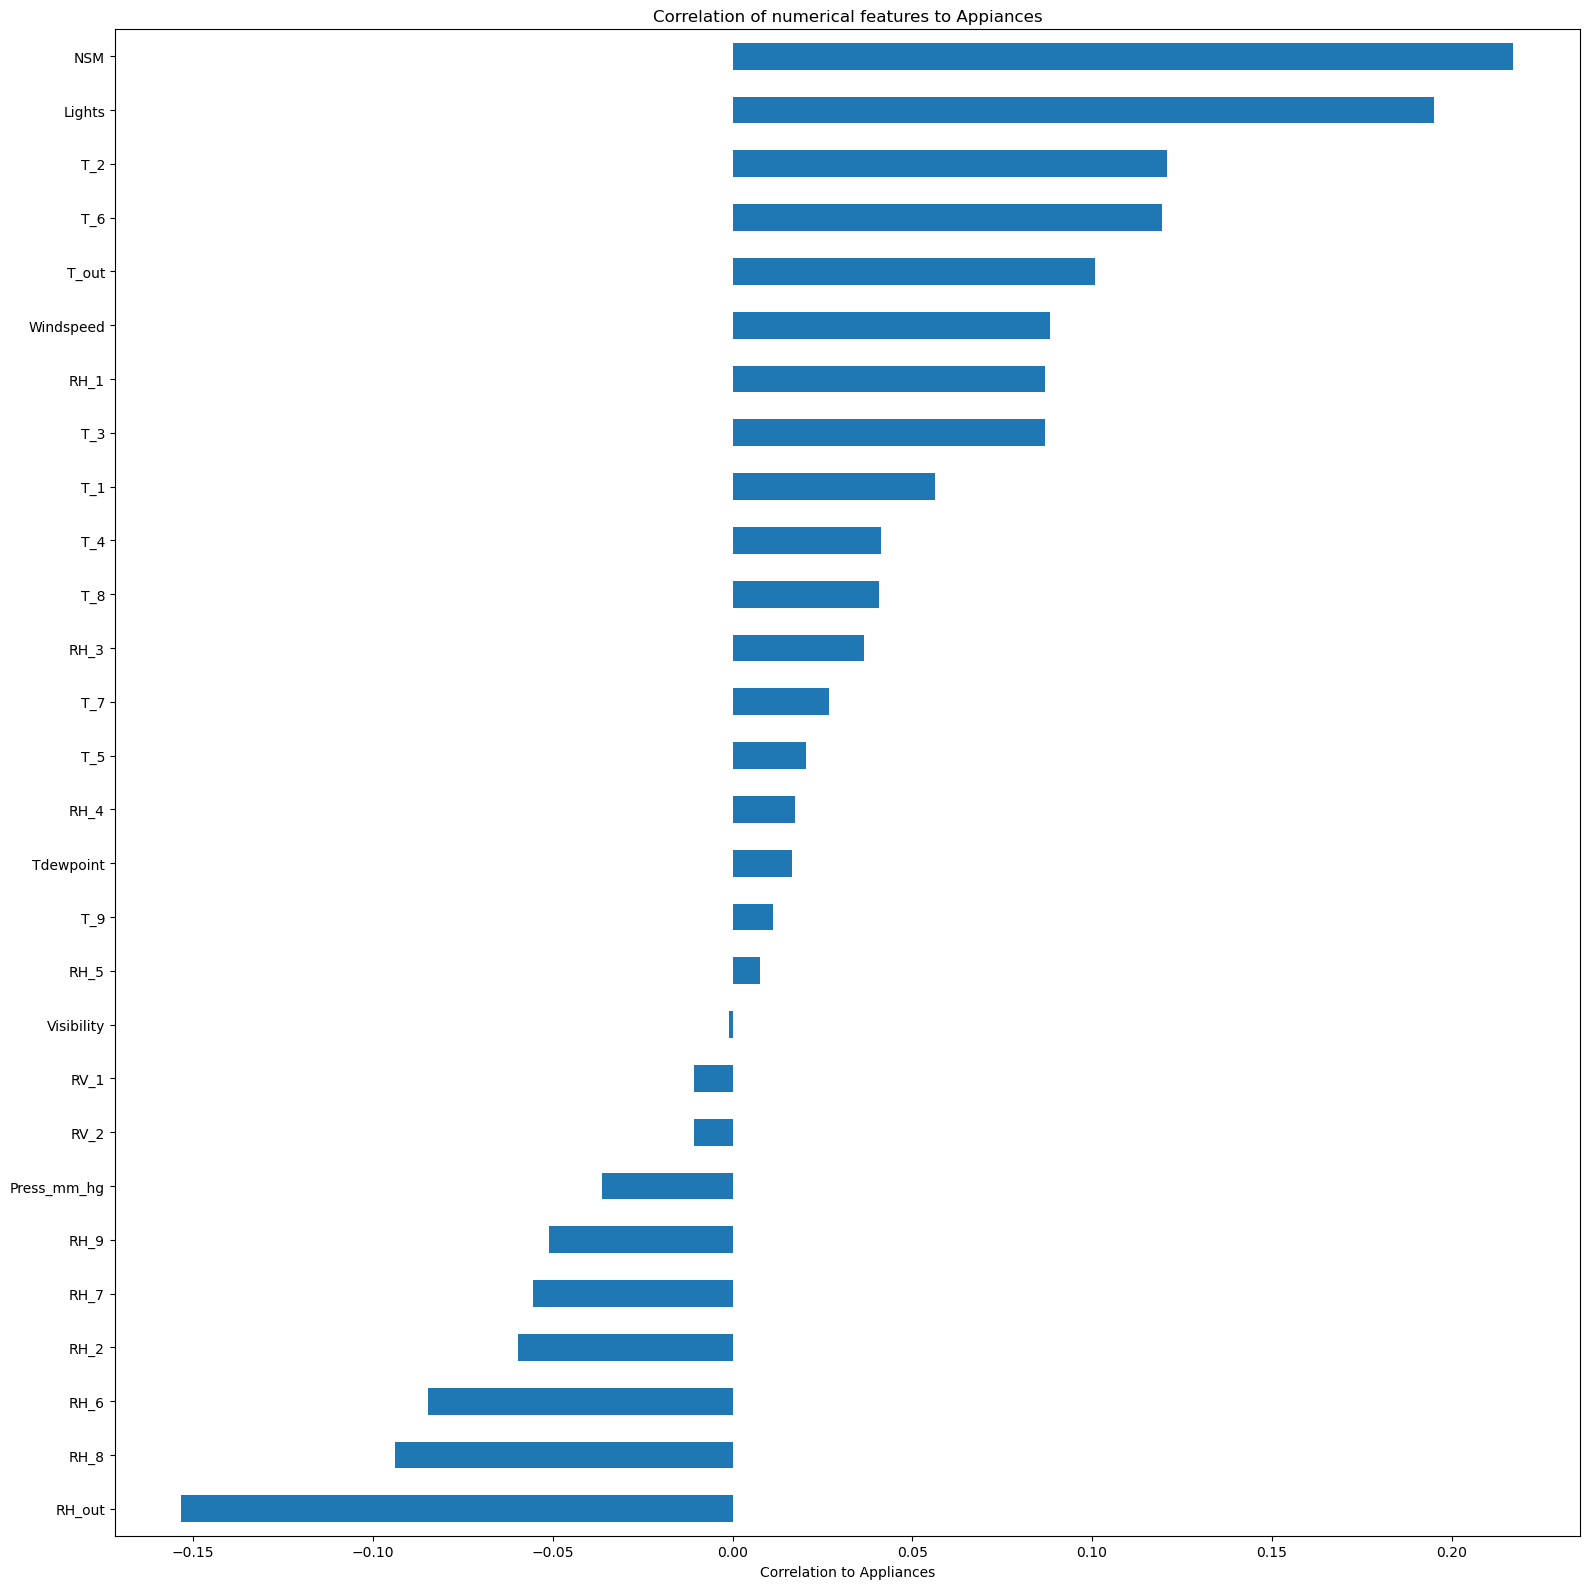

In [20]:

plt.figure(figsize=(16, 16))
corr["Appliances"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to Appiances")
plt.xlabel("Correlation to Appliances")
plt.tight_layout()
plt.show()


According to the two graph above, the appliances have the strongest positive correlation with lights and NSM, both of which are 0.2. On the other hand, there is a negative correlation between the appliances and outdoor humidity/RH6, which is -0.08. Additionally, there are some noteworthy correlations among other features. For instance, T1 T2 T3 T4 T5 T6 T7 T8 and T9 are positively correlated with the appliances. Furthermore, an intriguing correlation exists between pressure and wind speed, which is negative at -0.2.

But he heatmap shows only linear correlations, therefore does not apply all senarios.
Let us take a more intuitive look at the linear or nonlinear relationship between energy consumption and each feature.

In [21]:
df.columns


Index(['Appliances', 'Lights', 'T_1', 'RH_1', 'T_2', 'RH_2', 'T_3', 'RH_3',
       'T_4', 'RH_4', 'T_5', 'RH_5', 'T_6', 'RH_6', 'T_7', 'RH_7', 'T_8',
       'RH_8', 'T_9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'RV_1', 'RV_2', 'NSM'],
      dtype='object')

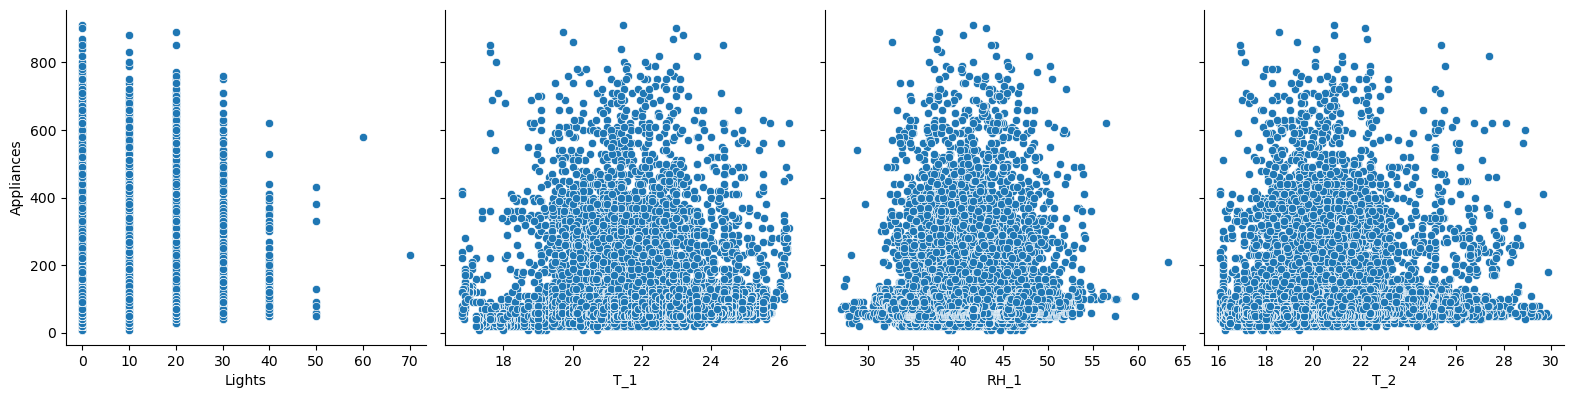

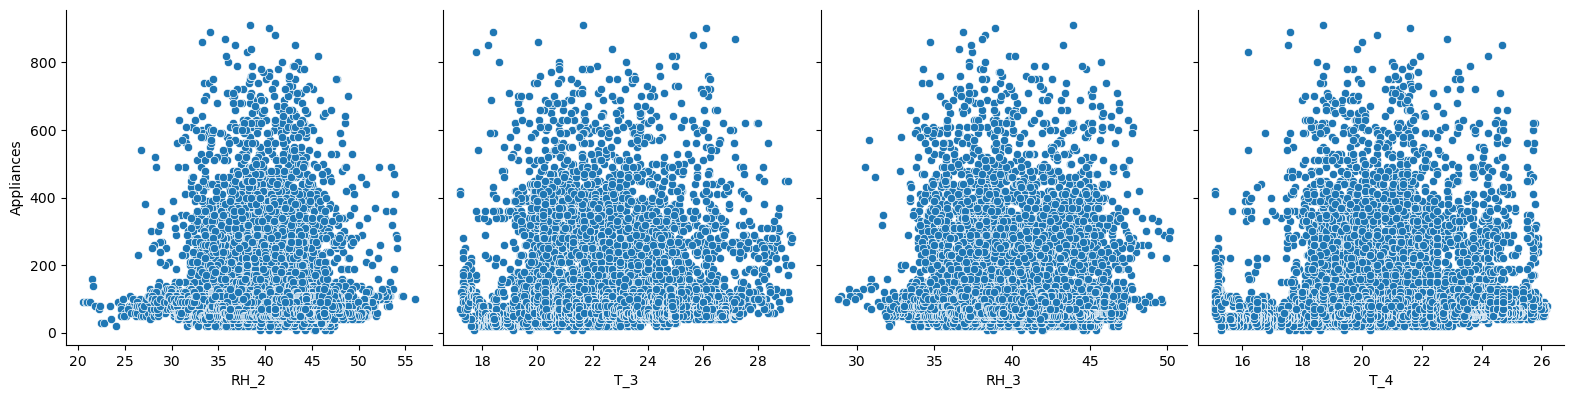

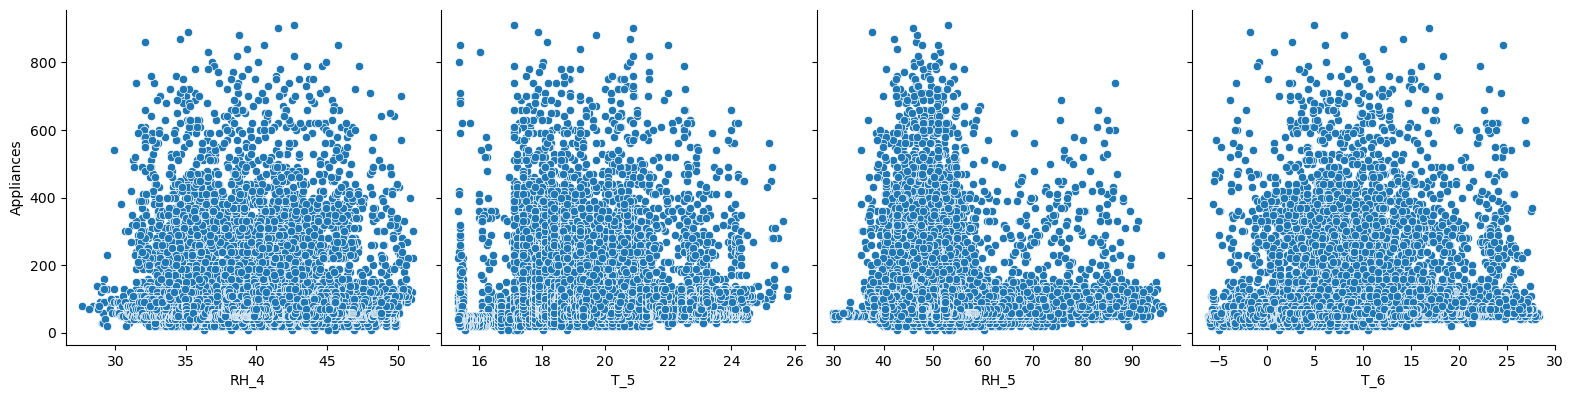

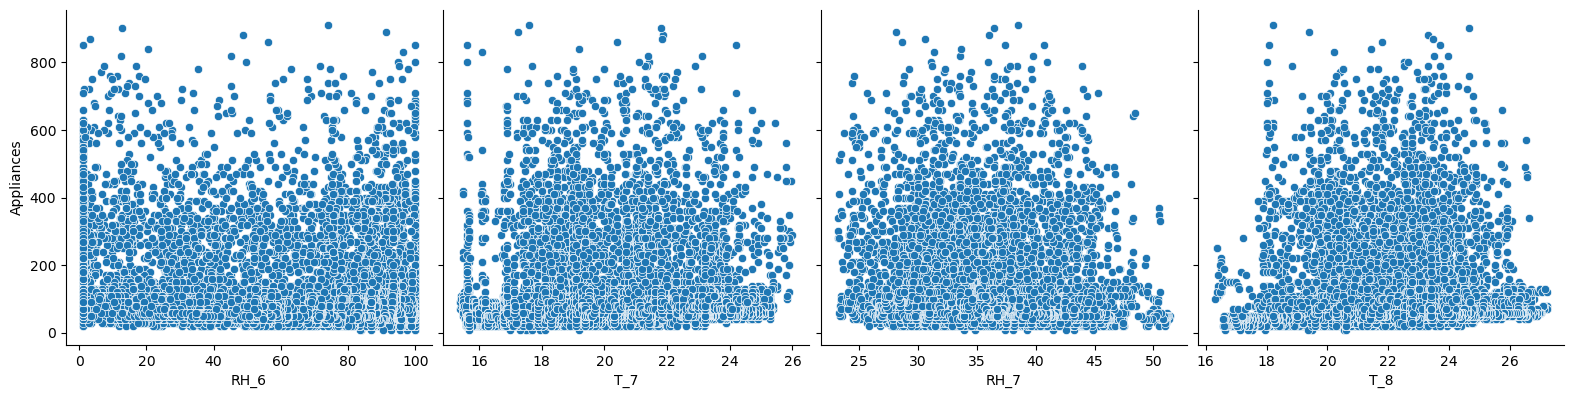

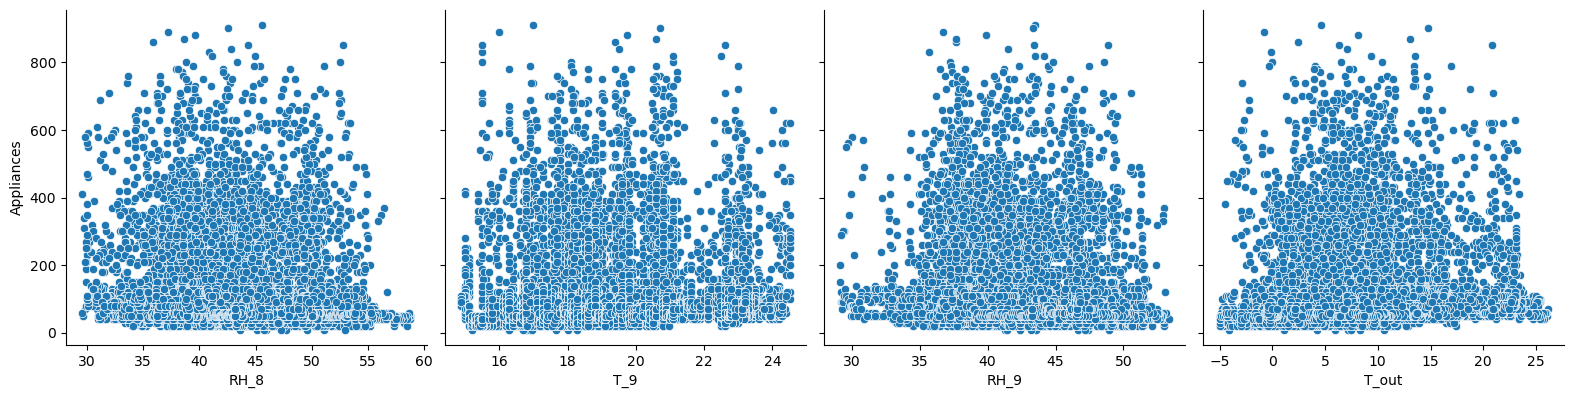

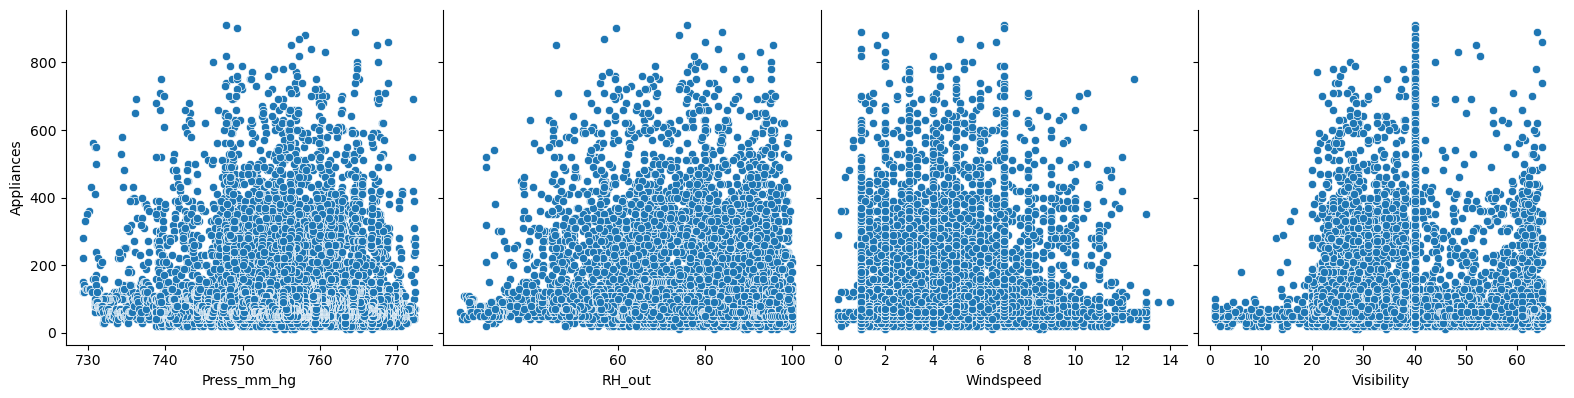

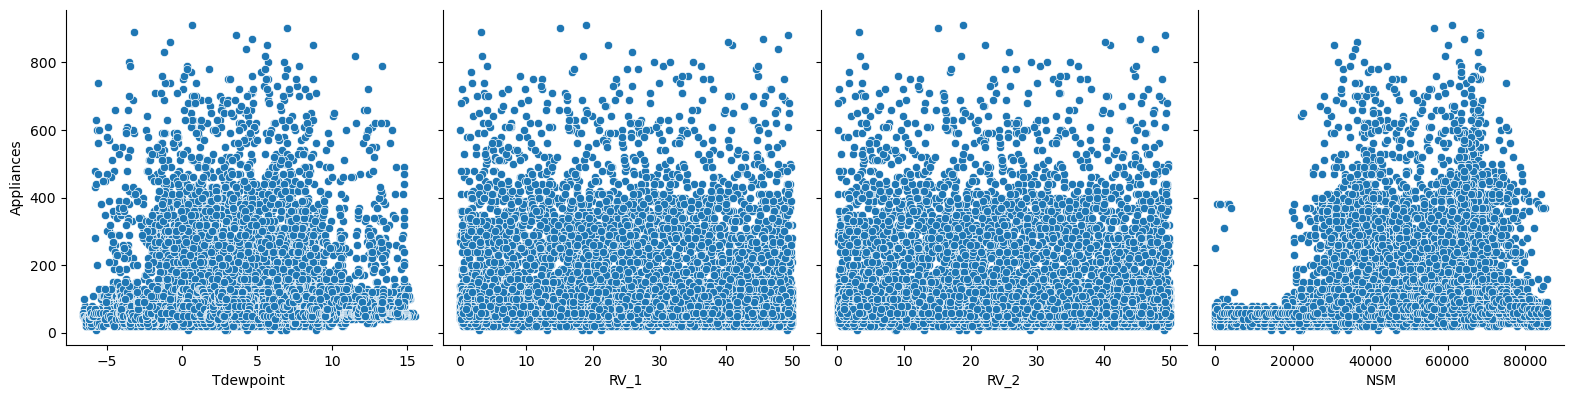

In [22]:

def pp(w, x, y, z):
    sns.pairplot(df, x_vars=[
                 w, x, y, z], y_vars='Appliances', height=4, aspect=1, kind='scatter')
    plt.show()


pp('Lights', 'T_1', 'RH_1', 'T_2')
pp('RH_2', 'T_3', 'RH_3', 'T_4')
pp('RH_4', 'T_5', 'RH_5', 'T_6')
pp('RH_6', 'T_7', 'RH_7', 'T_8')
pp('RH_8', 'T_9', 'RH_9', 'T_out')
pp('Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility')
pp('Tdewpoint', 'RV_1', 'RV_2', 'NSM')

From the plot, it can be seen that there is no direct plot that can show a linear relationship between them and energy consumption.

therefore, we can apply L1 regularisation to confirm

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Define feature matrix X and Appliances y
X = df.drop('Appliances', axis=1)  # drop the target variable from the feature matrix
y = df['Appliances']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Initialize Lasso regression model with alpha=0.1
lasso = Lasso(alpha=0.1)

# Fit the Lasso model to the training data
lasso.fit(X_train, y_train)

# Get the coefficients of the Lasso model
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})

# Select the features with non-zero coefficients
important_features = lasso_coefs.loc[lasso_coefs['Coefficient']
                                     != 0, 'Feature']

# Print the important features
print('Important Features:', important_features.to_list())


Important Features: ['Lights', 'T_1', 'RH_1', 'T_2', 'RH_2', 'T_3', 'RH_3', 'T_4', 'RH_4', 'T_5', 'RH_5', 'T_6', 'RH_6', 'T_7', 'RH_7', 'T_8', 'RH_8', 'T_9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'RV_1', 'NSM']


In [24]:

df.columns

Index(['Appliances', 'Lights', 'T_1', 'RH_1', 'T_2', 'RH_2', 'T_3', 'RH_3',
       'T_4', 'RH_4', 'T_5', 'RH_5', 'T_6', 'RH_6', 'T_7', 'RH_7', 'T_8',
       'RH_8', 'T_9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'RV_1', 'RV_2', 'NSM'],
      dtype='object')

there is no featrues need to be removed accroding L1 regularisation

In [25]:
df.shape


(19733, 29)

split train and test data

In [26]:
df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)
df_train.shape


(13813, 29)

In [27]:
y_train = np.log(df_train.Appliances)
X_train = df_train.drop("Appliances",1)

y_test= np.log(df_test.Appliances)
X_test = df_test.drop("Appliances",1)

/var/folders/jr/04mdkbxx3wq4f9ph1qnz71cr0000gn/T/ipykernel_9072/3684503460.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = df_train.drop("Appliances",1)
/var/folders/jr/04mdkbxx3wq4f9ph1qnz71cr0000gn/T/ipykernel_9072/3684503460.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = df_test.drop("Appliances",1)


select numeric columns

In [28]:
num_vars=X_train.select_dtypes(include=['int64','float64']).columns

In [29]:
num_vars


Index(['Lights', 'T_1', 'RH_1', 'T_2', 'RH_2', 'T_3', 'RH_3', 'T_4', 'RH_4',
       'T_5', 'RH_5', 'T_6', 'RH_6', 'T_7', 'RH_7', 'T_8', 'RH_8', 'T_9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'RV_1', 'RV_2', 'NSM'],
      dtype='object')

Removing the dimensional influence between some features.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


### 3. Implement prediction models

I picked three models: linear regression for predicting numerical values based on independent variables (Machine Learning Mastery 2016), random forest regression for dealing with non-linear data, and GBM for its high accuracy and usage in the studied paper(Candanedo et al 2017, p. 85).

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
#linear regression model
lm=LinearRegression()

In [32]:
from sklearn.ensemble import RandomForestRegressor
# create a random forest regression model with 100 trees
rf = RandomForestRegressor(n_estimators=100)


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
# create a GBM model with 100 trees
gbm = GradientBoostingRegressor(n_estimators=100)


### 4. Train prediction models

In [34]:
#linear regression
lm=lm.fit(X_train, y_train)
#random forest regression
rf = rf.fit(X_train, y_train)
# GBM
gbm = gbm.fit(X_train, y_train)


In [35]:
from sklearn import metrics

#predict the R-squared value of train data(Fernando 2021)
#This allows to evaluate how well the model is fitting the training data.
#to ensure that the model is not overfitting on the training data.

#linear regression
y_train_pred_lm = lm.predict(X_train)
print('R-squared value of train data by linear regression: ' + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lm)))
#random forest
y_train_pred_rf = rf.predict(X_train)
print('R-squared value of train data by random forest regression: ' +
      str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_rf)))
# GBM
y_train_pred_gbm = gbm.predict(X_train)
print('R-squared value of train data by GBM: ' + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_gbm)))

# using k-fold cross-validation and reports the average score as the train score of the model(Brownlee 2018).
#linear regression
accuracies = cross_val_score(lm, X_train, y_train, cv=5)
print("Train Score of linear regression:",np.mean(accuracies))
#random forest
accuracies = cross_val_score(rf, X_train, y_train, cv=5)
print("Train Score of random forest regression:", np.mean(accuracies))
# GBM
accuracies = cross_val_score(gbm, X_train, y_train, cv=5)
print("Train Score of GBM:", np.mean(accuracies))


R-squared value of train data by linear regression: 0.28223953887937236
R-squared value of train data by random forest regression: 0.9551523939051049
R-squared value of train data by GBM: 0.49452927890472387
Train Score of linear regression: 0.2798060272402302
Train Score of random forest regression: 0.6542839382583369
Train Score of GBM: 0.44884606405421223


The cross-validation results are consistent with the R-squared values, showing that the random forest model had the highest train score, followed by the GBM and then the linear regression model.

### 5. Test predictin models and show results

(Fernando 2021) R2 helps in assessing how well the model fits the data, (Glen 2018) while RMSE helps in evaluating the accuracy of the model's predictions. 

In [37]:
from sklearn.metrics import mean_squared_error

#R-squared value of test data
#linear regression
y_test_pred_lm = lm.predict(X_test)
print('R-squared value of test data by linear regression:' + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lm)))
#random forest
y_test_pred_rf = rf.predict(X_test)
print('R-squared value of test data by random forest regression:' +
      str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_rf)))
# GBM
y_test_pred_gbm = gbm.predict(X_test)
print('R-squared value of test data by GBM:' + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_gbm)))


#RMSE value of test data
print('RMSE of test data by linear regression is: \n',
      mean_squared_error(y_test, y_test_pred_lm))
print ('RMSE of test data by random forest regression is: \n', mean_squared_error(y_test, y_test_pred_rf))
print ('RMSE of test data by GBM is: \n', mean_squared_error(y_test, y_test_pred_gbm))


#score value of test data
#linear regression
print('linear regression test score: ' + str(lm.score(X_test,y_test)))
#random forest
print('random forest regression test score: ' + str(rf.score(X_test, y_test)))
# gbm
print('random forest regression test score: ' + str(gbm.score(X_test, y_test)))


R-squared value of test data by linear regression:0.27403440793311906
R-squared value of test data by random forest regression:0.6708941863682312
R-squared value of test data by GBM:0.4493492833570528
RMSE of test data by linear regression is: 
 0.32566193721419906
RMSE of test data by random forest regression is: 
 0.14763404490099183
RMSE of test data by GBM is: 
 0.24701718796310176
linear regression test score: 0.27403440793311906
random forest regression test score: 0.6708941863682312
random forest regression test score: 0.4493492833570528


### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [38]:
# Create a dictionary with the data
result = {'Model': ['Linear Regression', 'Random Forest', 'GBM'],
        'R-squared': [0.2769, 0.6719, 0.4475],
        'RMSE': [0.3244, 0.1472, 0.2479],
        'Test Score': [0.2769, 0.6719, 0.4475]}

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(result)

# Print the DataFrame
print(df)

               Model  R-squared    RMSE  Test Score
0  Linear Regression     0.2769  0.3244      0.2769
1      Random Forest     0.6719  0.1472      0.6719
2                GBM     0.4475  0.2479      0.4475


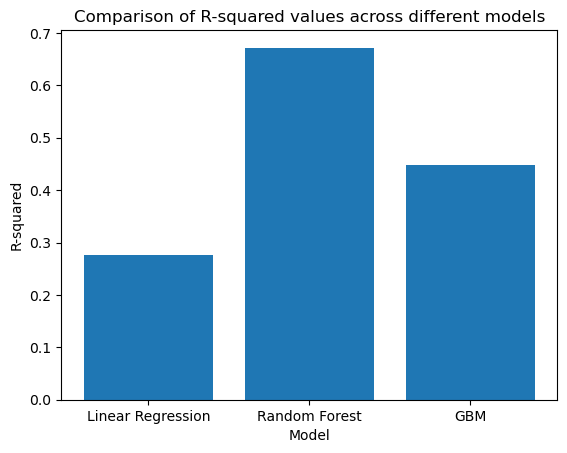

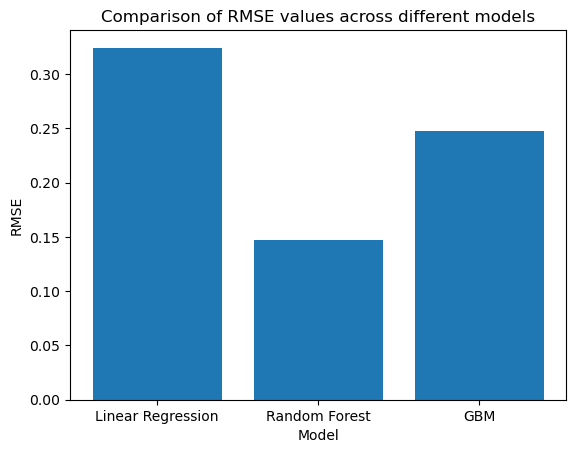

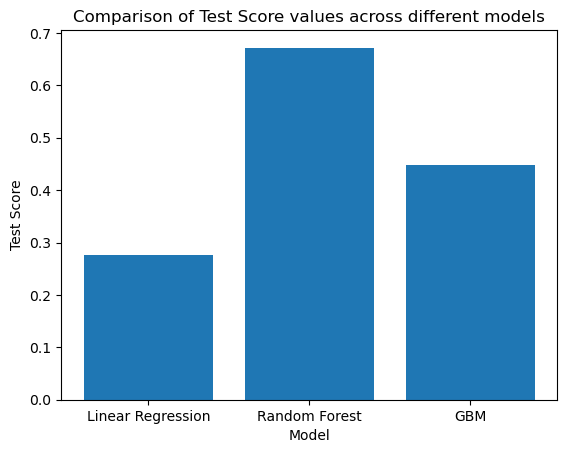

In [39]:
def showBar(b):
    # Create bar graph
    plt.bar(result['Model'], result[b])

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel(b)
    plt.title('Comparison of ' + b + ' values across different models')
    # Show graph
    plt.show()

showBar('R-squared')
showBar('RMSE')
showBar('Test Score')


The R-squared values of the random forest and GBM models are higher than that of the linear regression model, indicating better model fit. Additionally, the RMSE values of the random forest and GBM models are lower than that of the linear regression model, indicating lower prediction error. The test score of the random forest model is higher than that of the other models, indicating better prediction accuracy on the test data. Overall, the random forest model appears to perform the best among the three models.

### 7. Reflect on what you have learned by completing this assignment

I have learned how to preprocess raw data, which includes removing invalid inputs, filling in missing values, creating and deleting data. I also learned that box plots can be used to display outliers, and removing outliers can help us to find more accurate relationships between features. Data visualization is important, and different types of graphs can be used for different purposes. Analyzing the visuals can help us to identify more important and accurate features, allowing for more concise and effective model training. When selecting a model, it is important to fit it to the dataset. All data should be divided into training and testing sets, and different models should be trained to make predictions. By measuring certain parameters, we can evaluate the suitability of different models.

### 8. References

Brownlee, J 2016, Linear Regression for Machine Learning, Machine Learning Mastery, viewed 25 Mar 2023, <https://machinelearningmastery.com/linear-regression-for-machine-learning/>.

Brownlee, J 2018, A Gentle Introduction to k-fold Cross-Validation,  Machine Learning Mastery, viewed 25 Mar 2023, <https://machinelearningmastery.com/k-fold-cross-validation/>.

Candanedo, LM, Feldheim, V, & Deramaix, D 2017,'Data driven prediction models of energy use of appliances in a low-energy house', Energy and Buildings, vol. 140, pp. 81-97.

Fernando, J 2021, R-Squared Formula, Regression, and Interpretations, investopedia, viewed 25 Mar 2023, <https://www.investopedia.com/terms/r/r-squared.asp>.

Glen, S, RMSE: Root Mean Square Error, Statistics How To, viewed 25 Mar 2023, <https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/>.